In [2]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

BASE_PATH = r"C:\Users\Impana\Downloads\invoice-classification\\"


In [3]:
train_path = os.path.join(BASE_PATH, "data", "D3_WNtrain100k.csv")
test_path  = os.path.join(BASE_PATH, "data", "D2test.csv")

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print("Train:", train_df.shape, "Test:", test_df.shape)
print("Train classes:", train_df['label'].nunique(), 
      "Test classes:", test_df['label'].nunique())


Train: (100000, 2) Test: (663, 2)
Train classes: 34 Test classes: 32


In [4]:
X_train_text = train_df['description'].astype(str).tolist()
y_train = train_df['label'].astype(str).tolist()

X_test_text = test_df['description'].astype(str).tolist()
y_test = test_df['label'].astype(str).tolist()

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),      # unigrams + bigrams
    max_features=50000,     # cap feature size
    min_df=2                # ignore very rare terms
)

X_train = vectorizer.fit_transform(X_train_text)
X_test  = vectorizer.transform(X_test_text)

X_train.shape, X_test.shape


((100000, 19470), (663, 19470))

In [5]:
lsvm = LinearSVC(random_state=42)
lsvm.fit(X_train, y_train)

y_pred = lsvm.predict(X_test)


              precision    recall  f1-score   support

  CLASS-1248       1.00      1.00      1.00         1
  CLASS-1249       1.00      1.00      1.00        18
  CLASS-1250       1.00      1.00      1.00        27
  CLASS-1274       1.00      1.00      1.00       142
  CLASS-1294       1.00      1.00      1.00         4
  CLASS-1309       1.00      1.00      1.00         5
  CLASS-1322       1.00      1.00      1.00         4
  CLASS-1376       1.00      1.00      1.00        52
  CLASS-1429       1.00      1.00      1.00         5
  CLASS-1477       1.00      1.00      1.00         7
  CLASS-1522       1.00      1.00      1.00       104
  CLASS-1567       1.00      1.00      1.00        10
  CLASS-1652       1.00      1.00      1.00         2
  CLASS-1688       1.00      1.00      1.00         1
  CLASS-1721       1.00      1.00      1.00        15
  CLASS-1758       1.00      1.00      1.00       144
  CLASS-1770       1.00      1.00      1.00         3
  CLASS-1805       1.00    

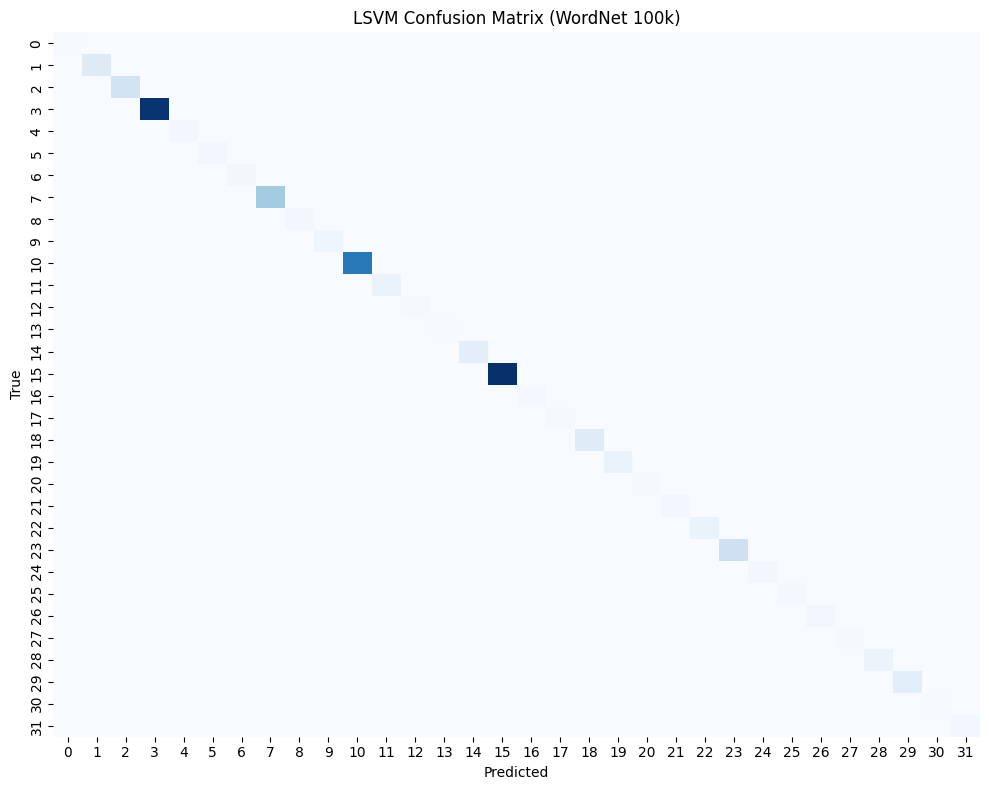

In [6]:
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=sorted(set(y_test)))
plt.figure(figsize=(10,8))
sns.heatmap(cm, cmap="Blues", cbar=False)
plt.title("LSVM Confusion Matrix (WordNet 100k)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [7]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

BASE_PATH = r"C:\Users\Impana\Downloads\invoice-classification\\"

train_df = pd.read_csv(os.path.join(BASE_PATH, "data", "D3train.csv"))
test_df  = pd.read_csv(os.path.join(BASE_PATH, "data", "D2test.csv"))

print("Train:", train_df.shape, "Test:", test_df.shape)
print("Train classes:", train_df['label'].nunique(),
      "Test classes:", test_df['label'].nunique())


Train: (7508, 2) Test: (663, 2)
Train classes: 34 Test classes: 32


In [8]:
X_train_text = train_df['description'].astype(str).tolist()
y_train = train_df['label'].astype(str).tolist()

X_test_text = test_df['description'].astype(str).tolist()
y_test = test_df['label'].astype(str).tolist()

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),      # 1–2 grams
    max_features=30000,     # smaller than before
    min_df=2
)

X_train = vectorizer.fit_transform(X_train_text)
X_test  = vectorizer.transform(X_test_text)

X_train.shape, X_test.shape


((7508, 5299), (663, 5299))

In [9]:
lsvm = LinearSVC(random_state=42)
lsvm.fit(X_train, y_train)

y_pred = lsvm.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  CLASS-1248       1.00      1.00      1.00         1
  CLASS-1249       1.00      1.00      1.00        18
  CLASS-1250       1.00      1.00      1.00        27
  CLASS-1274       1.00      1.00      1.00       142
  CLASS-1294       1.00      1.00      1.00         4
  CLASS-1309       1.00      1.00      1.00         5
  CLASS-1322       1.00      1.00      1.00         4
  CLASS-1376       1.00      1.00      1.00        52
  CLASS-1429       1.00      1.00      1.00         5
  CLASS-1477       1.00      1.00      1.00         7
  CLASS-1522       1.00      1.00      1.00       104
  CLASS-1567       1.00      1.00      1.00        10
  CLASS-1652       1.00      1.00      1.00         2
  CLASS-1688       1.00      1.00      1.00         1
  CLASS-1721       1.00      1.00      1.00        15
  CLASS-1758       1.00      1.00      1.00       144
  CLASS-1770       1.00      1.00      1.00         3
  CLASS-1805       1.00    